# **Import library**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# **Upload data**

In [2]:
load = pd.read_csv('/kaggle/input/superstore-marketing-campaign-dataset/superstore_data.csv')
df = pd.DataFrame(load)
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
print(df.shape)

(2240, 22)


# **Visualize data**

In [4]:
print(df.columns)

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')


In [5]:
print(df.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [6]:
df = df.dropna(axis=0, how='any')
print(df.isnull().sum())
print(df.shape)

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64
(2216, 22)


In [7]:
print(df.dtypes)

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object


In [8]:
num_df = df.drop(columns=['Id', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Response', 'Complain'])
obj_df = df.loc[:, ['Education', 'Marital_Status']]
bin_df = df.loc[:, ['Kidhome', 'Teenhome', 'Complain']]
label = df['Response']

In [9]:
print('num_df:', num_df.shape)
print('obj_df:', obj_df.shape)
print('bin_df:', bin_df.shape)
print('label:', label.shape)

num_df: (2216, 14)
obj_df: (2216, 2)
bin_df: (2216, 3)
label: (2216,)


In [10]:
num_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,0,6,16,24,11,0,34,2,3,1,2,7


In [11]:
num_df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [12]:
bin_df.describe()

,Kidhome,Teenhome,Complain
count,2216.000000,2216.000000,2216.000000
mean,0.441787,0.505415,0.009477
std,0.536896,0.544181,0.096907
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


In [13]:
label.describe()

count    2216.000000
mean        0.150271
std         0.357417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

## **Plot**

In [14]:
def plot_digit(dataframe):
  col_name = np.array(dataframe.columns)
  bins = dataframe.shape[0]
  for col in col_name:
    fig, axs = plt.subplots()
    axs.hist(dataframe[col],
             bins=bins,
             edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Responses')
    plt.title(col)
    plt.tight_layout()
    plt.show()

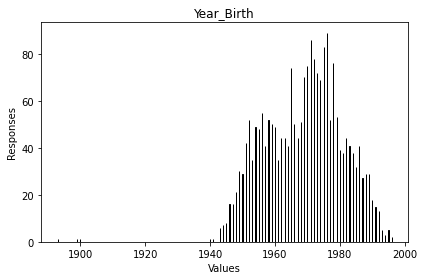

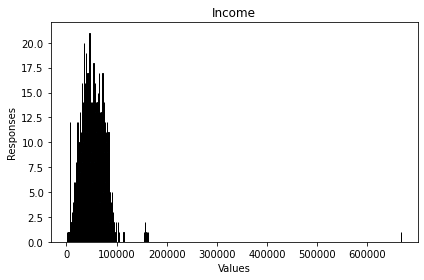

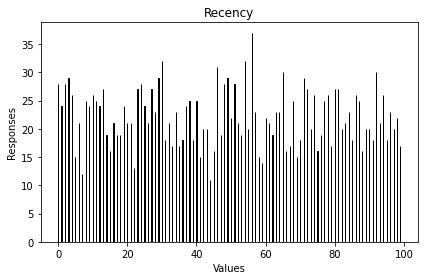

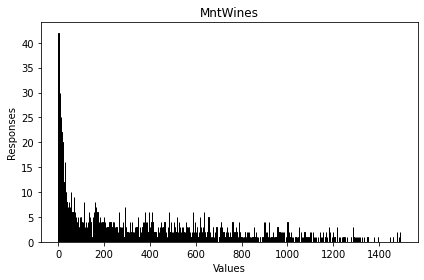

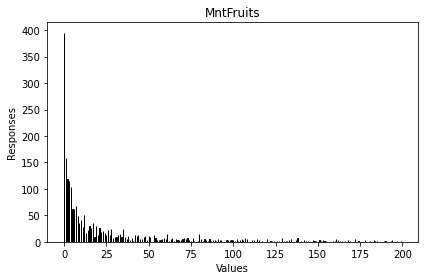

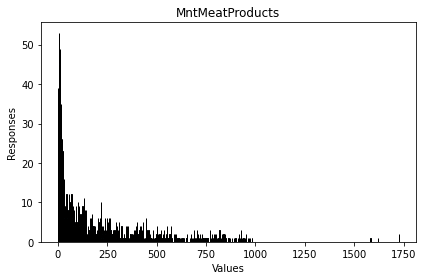

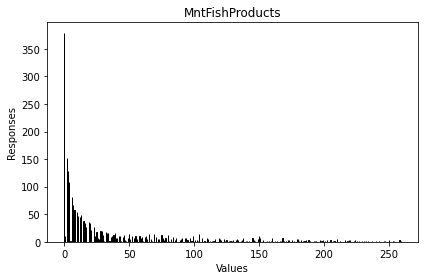

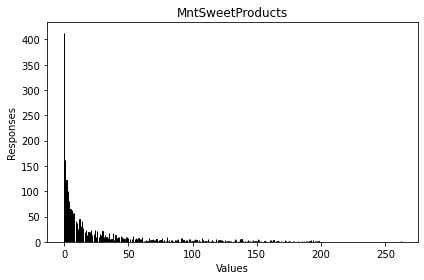

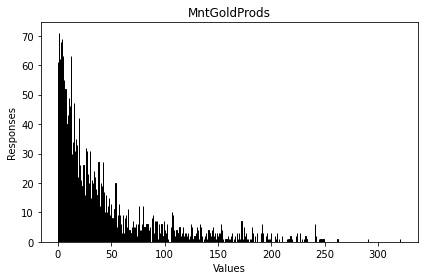

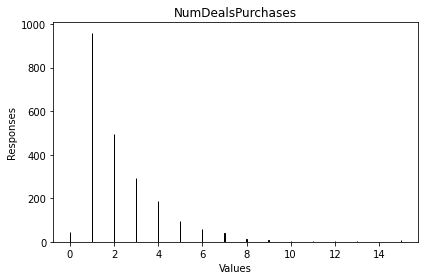

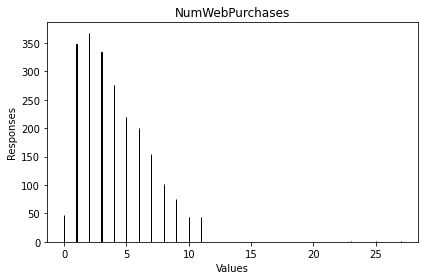

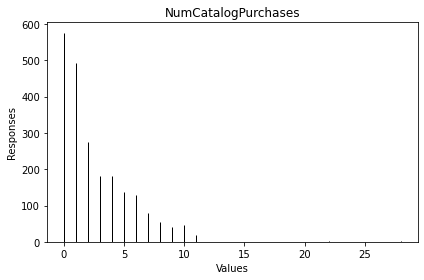

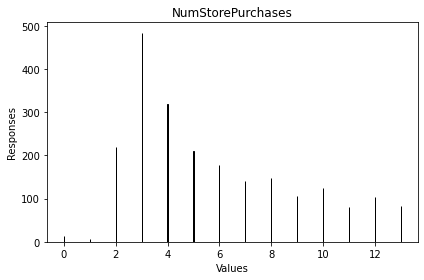

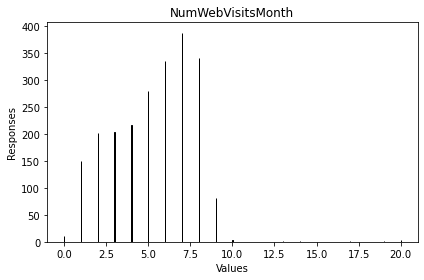

In [15]:
plot_digit(num_df)

# **Feature engineering**

## **Numeric data to Z score**

In [16]:
from scipy.stats import zscore

In [17]:
z_df = zscore(num_df)
z_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.098441,1.294840,-1.693488,-0.344228,1.951592,0.945465,1.340203,3.944475,3.359503,-0.688176,-0.031124,0.454182,0.061232,-1.781187
1,-0.652633,0.192461,-1.693488,0.471186,-0.536787,-0.459326,-0.559697,-0.658233,-0.134455,-0.688176,1.063634,0.112428,0.368919,-0.131574
2,-0.902990,0.596794,-1.693488,-0.507311,-0.385976,-0.481624,-0.413550,-0.609527,-0.269580,-0.688176,-0.396043,-0.229327,-0.246455,-1.368784
3,-0.151917,-0.785669,-1.693488,-0.874989,-0.662463,-0.740284,-0.687574,-0.658233,-0.848689,-0.688176,-1.125881,-0.912837,-1.169518,0.693232
4,1.684040,-1.222743,-1.693488,-0.886850,-0.260301,-0.637712,-0.486623,-0.658233,-0.192366,-0.168231,-0.396043,-0.571082,-1.169518,0.693232


In [18]:
z_df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,6.441698e-15,5.691396e-17,-5.130272e-17,-3.206420e-17,-6.412841e-18,-5.210433e-17,-2.084173e-17,-1.282568e-17,-1.603210e-17,-6.653322e-17,-9.859742e-17,-7.374767e-17,7.134285e-17,-5.771557e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-6.327410e+00,-2.007250e+00,-1.693488e+00,-9.046404e-01,-6.624630e-01,-7.447440e-01,-6.875744e-01,-6.582331e-01,-8.486891e-01,-1.208121e+00,-1.490800e+00,-9.128373e-01,-1.784893e+00,-2.193591e+00
25%,-8.195377e-01,-6.732620e-01,-8.642385e-01,-8.334770e-01,-6.121927e-01,-6.733896e-01,-6.327696e-01,-6.338802e-01,-6.749564e-01,-6.881759e-01,-7.609619e-01,-9.128373e-01,-8.618303e-01,-9.563810e-01
50%,9.844093e-02,-3.439972e-02,-4.365786e-04,-3.872229e-01,-4.613818e-01,-4.414876e-01,-4.683552e-01,-4.634095e-01,-3.757501e-01,-1.682312e-01,-3.112352e-02,-2.293274e-01,-2.464554e-01,2.808287e-01
75%,6.826092e-01,6.466600e-01,8.633654e-01,5.927571e-01,1.669967e-01,2.910105e-01,2.258390e-01,1.454144e-01,2.323143e-01,3.517135e-01,6.987149e-01,4.541825e-01,6.766069e-01,6.932320e-01
max,2.268209e+00,2.441328e+01,1.727167e+00,3.522319e+00,4.339430e+00,6.948158e+00,4.043907e+00,5.722241e+00,5.347777e+00,6.591050e+00,8.362018e+00,8.656301e+00,2.215044e+00,6.054474e+00


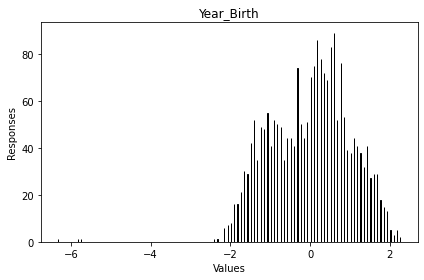

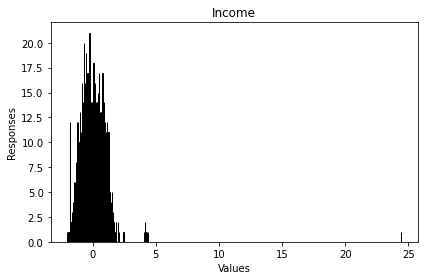

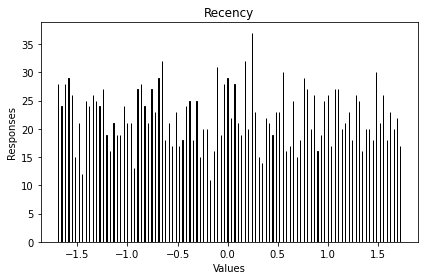

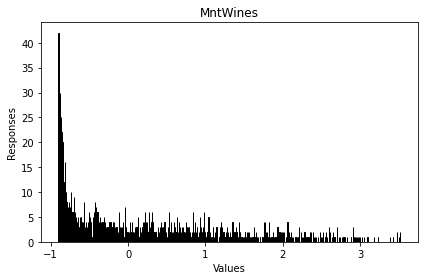

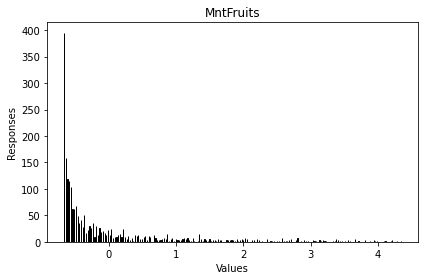

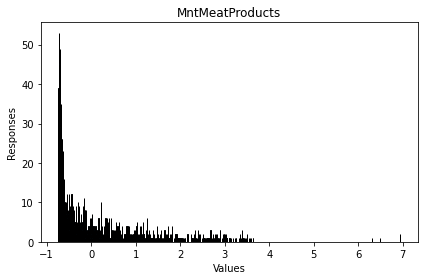

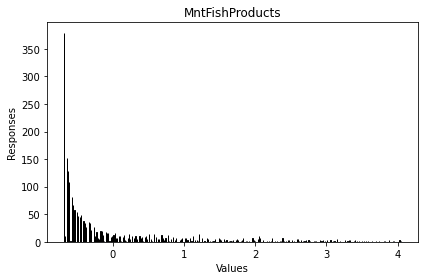

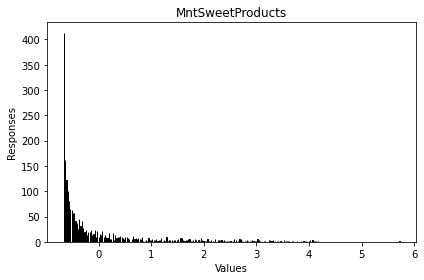

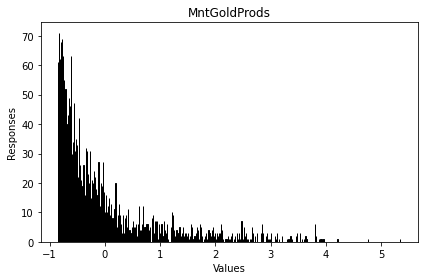

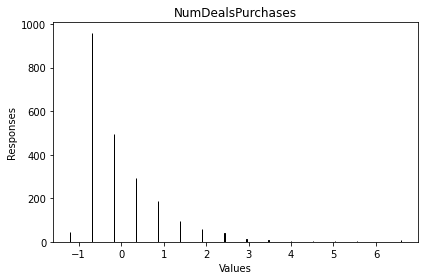

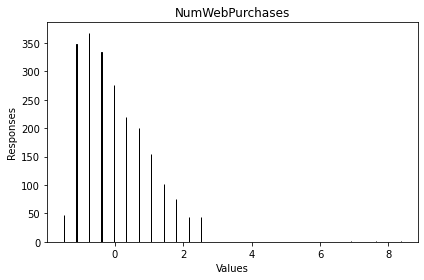

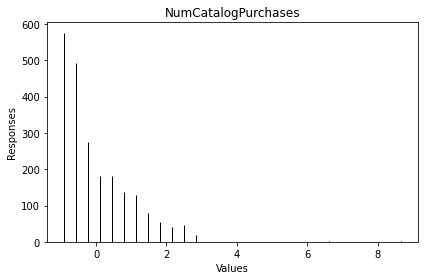

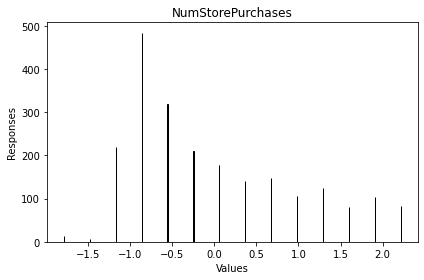

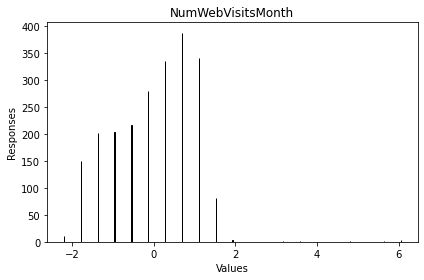

In [19]:
plot_digit(z_df)

## **Object data to Onehot data**

In [20]:
obj_df.head()

,Education,Marital_Status
0,Graduation,Divorced
1,Graduation,Single
2,Graduation,Married
3,Graduation,Together
4,Graduation,Single


In [21]:
onehot_df = pd.get_dummies(obj_df)
onehot_df.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0,0


## **Combine all features**

In [22]:
features = pd.concat([z_df, bin_df, onehot_df], axis=1)
features.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.098441,1.294840,-1.693488,-0.344228,1.951592,0.945465,1.340203,3.944475,3.359503,-0.688176,...,0,0,0,0,1,0,0,0,0,0
1,-0.652633,0.192461,-1.693488,0.471186,-0.536787,-0.459326,-0.559697,-0.658233,-0.134455,-0.688176,...,0,0,0,0,0,0,1,0,0,0
2,-0.902990,0.596794,-1.693488,-0.507311,-0.385976,-0.481624,-0.413550,-0.609527,-0.269580,-0.688176,...,0,0,0,0,0,1,0,0,0,0
3,-0.151917,-0.785669,-1.693488,-0.874989,-0.662463,-0.740284,-0.687574,-0.658233,-0.848689,-0.688176,...,0,0,0,0,0,0,0,1,0,0
4,1.684040,-1.222743,-1.693488,-0.886850,-0.260301,-0.637712,-0.486623,-0.658233,-0.192366,-0.168231,...,0,0,0,0,0,0,1,0,0,0


# **Model**

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## **Split data**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=101)

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1772, 30)
(1772,)
(444, 30)
(444,)


## **Create model**

In [26]:
from tensorflow.python import metrics
from tensorflow.python.ops.math_ops import sigmoid
model = Sequential()
model.add(InputLayer(input_shape=(features.shape[1], ), name='input'))
model.add(Dense(units=8, activation='sigmoid', name='hidden2'))
model.add(Dense(units=1, activation='sigmoid', name='output'))

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics='accuracy')

2023-01-19 09:19:00.003497: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden2 (Dense)              (None, 8)                 248       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


## **Train & Evaluate model**

In [28]:
history = model.fit(x=x_train, 
          y=y_train, 
          batch_size=100,
          epochs=110,
          verbose=1,
          validation_data=(x_test, y_test))

2023-01-19 09:19:00.492022: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/110
18/18 [==============================] - 1s 15ms/step - loss: 0.6855 - accuracy: 0.5830 - val_loss: 0.6672 - val_accuracy: 0.5991
Epoch 2/110
18/18 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6648 - val_loss: 0.6279 - val_accuracy: 0.7050
Epoch 3/110
18/18 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.7325 - val_loss: 0.5933 - val_accuracy: 0.7793
Epoch 4/110
18/18 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7968 - val_loss: 0.5628 - val_accuracy: 0.8221
Epoch 5/110
18/18 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.8194 - val_loss: 0.5362 - val_accuracy: 0.8626
Epoch 6/110
18/18 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.8431 - val_loss: 0.5125 - val_accuracy: 0.8559
Epoch 7/110
18/18 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.8471 - val_loss: 0.4919 - val_accuracy: 0.8649
Epoch 8/110


In [29]:
hist = pd.DataFrame(history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.685480,0.582957,0.667233,0.599099
1,0.644345,0.664786,0.627907,0.704955
2,0.608018,0.732506,0.593322,0.779279
3,0.576515,0.796840,0.562780,0.822072
4,0.548918,0.819413,0.536215,0.862613
...,...,...,...,...
105,0.305213,0.866253,0.326387,0.855856
106,0.304954,0.866817,0.326424,0.855856
107,0.304840,0.866253,0.326773,0.855856
108,0.304698,0.866253,0.326549,0.855856


In [30]:
hist_loss = hist.loc[:, ['loss', 'val_loss']]
hist_loss

,loss,val_loss
0,0.685480,0.667233
1,0.644345,0.627907
2,0.608018,0.593322
3,0.576515,0.562780
4,0.548918,0.536215
...,...,...
105,0.305213,0.326387
106,0.304954,0.326424
107,0.304840,0.326773
108,0.304698,0.326549


In [31]:
hist_acc = hist.loc[:, ['accuracy', 'val_accuracy']]
hist_acc

,accuracy,val_accuracy
0,0.582957,0.599099
1,0.664786,0.704955
2,0.732506,0.779279
3,0.796840,0.822072
4,0.819413,0.862613
...,...,...
105,0.866253,0.855856
106,0.866817,0.855856
107,0.866253,0.855856
108,0.866253,0.855856


In [32]:
def plot_loss(history_loss):
  plt.figure()
  plt.title('Loss')
  plt.plot(history_loss)
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  plt.legend(['loss', 'val_loss'])
  plt.tight_layout()
  plt.show()

In [33]:
def plot_acc(history_acc):
  plt.figure()
  plt.title('Accuracy')
  plt.plot(history_acc)
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  plt.legend(['accuracy', 'val_accuracy'])
  plt.tight_layout()
  plt.show()

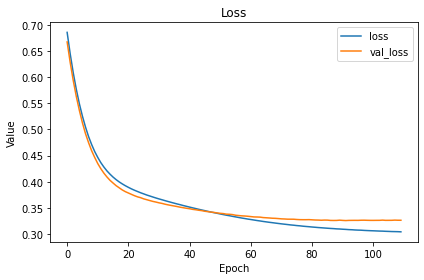

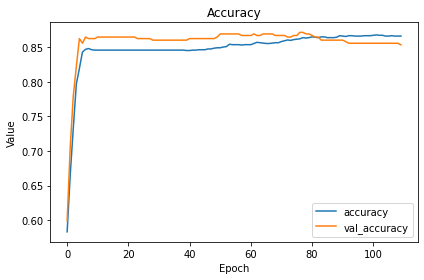

In [34]:
plot_loss(hist_loss)
plot_acc(hist_acc)

In [35]:
y_pred = model.predict(x_test)
y_pred = np.around(y_pred)

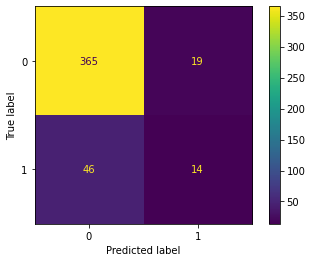

In [36]:
confusion = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion)
cm_display.plot()
plt.show()

In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       384
           1       0.42      0.23      0.30        60

    accuracy                           0.85       444
   macro avg       0.66      0.59      0.61       444
weighted avg       0.83      0.85      0.83       444



# **Review**
> The model isn't good enough because the number of data class 1 I trained is too small.